In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import cpi
import statsmodels.stats.multitest as multi

In [2]:
path = r'/Users/jonathan.phelan/Downloads/teacher_salary_data' # use your path
all_files = glob.glob(path + "/*.csv")


In [3]:
all_files

['/Users/jonathan.phelan/Downloads/teacher_salary_data/2006_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2008_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2005_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2004_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2009_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2003_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2007_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2011_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2010_tsr_public_dataset.csv',
 '/Users/jonathan.phelan/Downloads/teacher_salary_data/2012-tsr-public-dataset.csv']

In [4]:
dfs=[]


for i in all_files:
    file=pd.read_csv(i)
    file_name=str(i)
    file_name=file_name.split('/')[5]
    file['filename']=file_name
    dfs.append(file)
    

master_df = pd.concat(dfs, axis=0, ignore_index=True)

/anaconda3/envs/python-data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,34,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/envs/python-data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/envs/python-data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/envs/python-data/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,7,8,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interacti

In [5]:
master_df['year']=master_df['filename'].str[0:4]
master_df['year'].value_counts()

2010    167821
2009    167743
2008    164325
2011    163228
2012    162960
2007    160869
2005    160566
2006    159909
2003    159250
2004    158216
Name: year, dtype: int64

In [6]:
master_df.shape

(1624887, 63)

In [7]:
master_df.head()

,fy,rcdt,dst_name,dst_addr,dst_city,dst_st,dst_zip,dst_zip_plus4,sch_num,sch_name,...,assign4_desc,assignment_5,assign5_desc,assignment_6,assign6_desc,assignment_7,assign7_desc,pct_admin,filename,year
0,2006,05016036002,Winnetka SD 36,1235 Oak St,Winnetka,IL,60093.0,2168,1005,Carleton W Washburne School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006
1,2006,34049220026,Barrington CUSD 220,310 James St,Barrington,IL,60010.0,3329,0004,Barrington High School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006
2,2006,31045046022,SD U-46,355 E Chicago St,Elgin,IL,60120.0,6543,1003,Abbott Middle School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006
3,2006,19022086017,Hinsdale Twp HSD 86,5500 S Grant St,Hinsdale,IL,60521.0,4578,0002,Hinsdale South High School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006
4,2006,05016028002,Northbrook SD 28,1475 Maple Ave,Northbrook,IL,60062.0,5418,2002,Greenbriar Elem School,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2006_tsr_public_dataset.csv,2006


In [8]:
for i in master_df.columns:
    print (i,'--',master_df[i].dtype, master_df[i].isnull().sum())

('fy', '--', dtype('int64'), 0)
('rcdt', '--', dtype('O'), 0)
('dst_name', '--', dtype('O'), 41)
('dst_addr', '--', dtype('O'), 41)
('dst_city', '--', dtype('O'), 41)
('dst_st', '--', dtype('O'), 41)
('dst_zip', '--', dtype('float64'), 41)
('dst_zip_plus4', '--', dtype('O'), 41)
('sch_num', '--', dtype('O'), 0)
('sch_name', '--', dtype('O'), 21)
('sch_addr', '--', dtype('O'), 121104)
('sch_city', '--', dtype('O'), 121104)
('sch_st', '--', dtype('O'), 121104)
('sch_zip', '--', dtype('float64'), 121104)
('sch_zip_plus4', '--', dtype('O'), 121104)
('last_name', '--', dtype('O'), 0)
('first_name', '--', dtype('O'), 0)
('mid_init', '--', dtype('O'), 0)
('gender', '--', dtype('O'), 0)
('race_ethnicity_cd', '--', dtype('O'), 328)
('race_ethnicity_desc', '--', dtype('O'), 419)
('tsr_status_cd', '--', dtype('int64'), 0)
('tsr_status_desc', '--', dtype('O'), 0)
('location_cd', '--', dtype('O'), 9)
('location_desc', '--', dtype('O'), 54)
('emply_type', '--', dtype('O'), 0)
('emply_desc', '--', dt

In [9]:
master_df.pos_desc.value_counts()

Elementary Teacher                     575728
High School Teacher                    347598
Special Education Teacher              216629
Junior High/Middle Teacher             207556
Social Worker                           33327
Guidance Counselor                      31203
Speech/Language Pathologist             26661
Elementary Principal                    23705
Librarian/Media Specialist              20472
Psychologist                            18757
Coordinator                             10095
Nurse                                    9897
Director                                 9638
Assistant Elementary Principal           9546
Reading Specialist                       9214
District Superintendent                  8616
Assistant High School Principal          8159
High School Principal                    7369
Junior High/Middle Principal             6004
Program Supervisor                       5848
Kindergarten                             5671
Assistant Jr High/Middle Principal

In [10]:
##Convert isnull values to 'missing' if variable is object, and -9 if variable is float64 or int64
for i in master_df.columns:
    if master_df[i].dtype=='object':
        master_df[i].fillna("missing", inplace = True) 
    else:
        if master_df[i].dtype=='float64' or master_df[i].dtype=='int':
            master_df[i].fillna(-9, inplace=True)
            


In [11]:
master_df.head(10)

,fy,rcdt,dst_name,dst_addr,dst_city,dst_st,dst_zip,dst_zip_plus4,sch_num,sch_name,...,assign4_desc,assignment_5,assign5_desc,assignment_6,assign6_desc,assignment_7,assign7_desc,pct_admin,filename,year
0,2006,05016036002,Winnetka SD 36,1235 Oak St,Winnetka,IL,60093.0,2168,1005,Carleton W Washburne School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
1,2006,34049220026,Barrington CUSD 220,310 James St,Barrington,IL,60010.0,3329,0004,Barrington High School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
2,2006,31045046022,SD U-46,355 E Chicago St,Elgin,IL,60120.0,6543,1003,Abbott Middle School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
3,2006,19022086017,Hinsdale Twp HSD 86,5500 S Grant St,Hinsdale,IL,60521.0,4578,0002,Hinsdale South High School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
4,2006,05016028002,Northbrook SD 28,1475 Maple Ave,Northbrook,IL,60062.0,5418,2002,Greenbriar Elem School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
5,2006,34049038002,Big Hollow SD 38,26051 W Nippersink,Ingleside,IL,60041.0,8785,2002,Big Hollow Elem School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
6,2006,24032101016,Morris CHSD 101,1000 Union St,Morris,IL,60450.0,1268,0001,Morris Community High School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
7,2006,05016214017,Township HSD 214,2121 S Goebbert Rd,Arlington Heights,IL,60005.0,4205,0002,Elk Grove High School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
8,2006,15016299025,City of Chicago SD 299,125 S Clark St,Chicago,IL,60603.0,5200,0030,Mather High School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006
9,2006,19022200026,CUSD 200,130 W Park Ave,Wheaton,IL,60189.0,6460,1017,Edison Middle School,...,missing,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006


In [12]:
master_df.pos_desc.value_counts()

Elementary Teacher                     575728
High School Teacher                    347598
Special Education Teacher              216629
Junior High/Middle Teacher             207556
Social Worker                           33327
Guidance Counselor                      31203
Speech/Language Pathologist             26661
Elementary Principal                    23705
Librarian/Media Specialist              20472
Psychologist                            18757
Coordinator                             10095
Nurse                                    9897
Director                                 9638
Assistant Elementary Principal           9546
Reading Specialist                       9214
District Superintendent                  8616
Assistant High School Principal          8159
High School Principal                    7369
Junior High/Middle Principal             6004
Program Supervisor                       5848
Kindergarten                             5671
Assistant Jr High/Middle Principal

In [13]:
master_df['salary'].describe()

count    1.624887e+06
mean     6.110860e+04
std      2.446809e+04
min      0.000000e+00
25%      4.424000e+04
50%      5.687100e+04
75%      7.417092e+04
max      4.416120e+05
Name: salary, dtype: float64

In [14]:
#Remove cases where salary is listed as $0.
master_df=master_df[master_df['salary']>0]
master_df['salary'].describe()

count    1.616995e+06
mean     6.140685e+04
std      2.415150e+04
min      4.000000e-02
25%      4.441693e+04
50%      5.700600e+04
75%      7.427562e+04
max      4.416120e+05
Name: salary, dtype: float64

In [15]:
master_df.corr()

,fy,dst_zip,sch_zip,tsr_status_cd,salary,months_employed,pct_emp,fte,dist_exp,state_exp,...,high_degre_cd,pos_cd,assignment_1,assignment_2,assignment_3,assignment_4,assignment_5,assignment_6,assignment_7,pct_admin
fy,1.000000,-0.007896,-0.001434,NaN,0.195960,0.032849,0.009249,0.019007,-0.039547,-0.042608,...,0.075001,0.087288,0.271140,0.198962,0.075409,0.157019,0.147550,0.222283,0.341956,0.001959
dst_zip,-0.007896,1.000000,0.000381,NaN,-0.241620,-0.172460,0.001315,0.004988,0.064842,0.076108,...,-0.157714,-0.026539,-0.008210,-0.004976,0.030817,0.011511,-0.003581,0.004269,0.003908,0.008223
sch_zip,-0.001434,0.000381,1.000000,NaN,-0.129621,-0.195406,0.050526,0.052502,0.014452,-0.047419,...,-0.092574,-0.114391,-0.092955,0.005634,0.013792,0.002527,0.003840,-0.010904,-0.010837,-0.240681
tsr_status_cd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,0.195960,-0.241620,-0.129621,NaN,1.000000,0.458009,0.244898,0.269855,0.484435,0.546639,...,0.450143,-0.059107,0.090321,0.023342,0.004795,0.023979,0.031311,0.036270,0.061693,0.432307
months_employed,0.032849,-0.172460,-0.195406,NaN,0.458009,1.000000,0.046650,0.294615,0.070333,0.124538,...,0.181528,-0.109697,0.072796,-0.027707,-0.012380,0.006625,0.017962,0.003518,0.008439,0.509473
pct_emp,0.009249,0.001315,0.050526,NaN,0.244898,0.046650,1.000000,0.880228,0.056413,0.011321,...,0.010024,-0.063394,0.021708,0.020440,0.018361,0.016256,0.014593,0.008762,0.006814,0.015311
fte,0.019007,0.004988,0.052502,NaN,0.269855,0.294615,0.880228,1.000000,0.075325,0.038753,...,0.026038,-0.056160,0.025248,0.020990,0.019167,0.018230,0.017184,0.012254,0.012818,0.020655
dist_exp,-0.039547,0.064842,0.014452,NaN,0.484435,0.070333,0.056413,0.075325,1.000000,0.891221,...,0.217086,-0.031628,0.024383,-0.013178,-0.006957,-0.011595,-0.009366,-0.018721,-0.023253,0.045215
state_exp,-0.042608,0.076108,-0.047419,NaN,0.546639,0.124538,0.011321,0.038753,0.891221,1.000000,...,0.272230,-0.037440,0.029497,-0.012486,-0.006417,-0.016684,-0.017121,-0.019145,-0.022807,0.170931


In [16]:
#Show mean salary by zip and year.
salaries_zip=pd.pivot_table(data=master_df, index='sch_zip', values='salary', aggfunc=[np.min, np.max, np.median, np.mean, lambda x: x.sem(), len])
#Create a summary table of salary with different stats.
#salaries_zip.columns = salaries_zip.columns.get_level_values(0)
#salaries_zip['std_error']=salaries_zip['std']/np.sqrt(salaries_zip['len'])
salaries_zip

,amin,amax,median,mean,<lambda>,len
,salary,salary,salary,salary,salary,salary
sch_zip,,,,,,
-9.0,38.00,411510.88,63993.200,71545.897771,111.150914,117508.0
60002.0,2398.86,155317.02,49809.455,53882.934976,328.484630,3680.0
60004.0,3709.00,202678.99,69134.885,72301.556845,372.442021,5480.0
60005.0,3480.00,166748.40,63944.945,66891.319658,488.575232,2396.0
60007.0,912.00,201503.10,71718.080,74436.359363,367.561840,5102.0
60008.0,115.32,198583.92,76534.000,77794.352633,427.342934,4029.0
60010.0,2929.57,188754.60,63096.055,69076.722752,334.331932,6370.0
60012.0,20322.68,174207.78,78604.125,80365.826349,839.457742,1090.0


In [17]:
salaries_year=pd.pivot_table(data=master_df, index='year', values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, lambda x: x.sem(), len])
salaries_year.columns = salaries_year.columns.get_level_values(0)
salaries_year



,amin,amax,median,mean,std,<lambda>,len
year,,,,,,,
2003,40.00,353351.13,49461.540,53574.750243,20859.142724,52.275926,159217.0
2004,70.00,302746.00,51324.130,55583.790745,21864.080655,54.973064,158184.0
2005,100.00,361146.50,53117.580,57515.463402,22546.076454,56.270140,160541.0
2006,41.00,441612.00,54262.705,58716.460367,23101.872025,57.773459,159896.0
2007,90.00,385378.73,55661.900,60349.983139,23485.898289,58.982433,158551.0
2008,16.00,411510.88,58280.500,62943.360078,24376.322021,60.215071,163880.0
2009,36.00,368589.94,59178.000,63743.418337,24203.229284,59.274479,166729.0
2010,0.04,413000.00,60958.000,65478.907039,24687.961126,60.527710,166365.0
2011,52.21,358750.55,62676.195,67114.777919,25141.948123,62.476086,161946.0


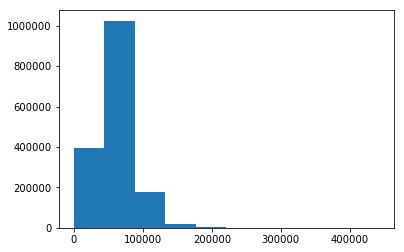

In [18]:
master_df['salary'].hist().grid(False)
plt.show()

/anaconda3/envs/python-data/lib/python2.7/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


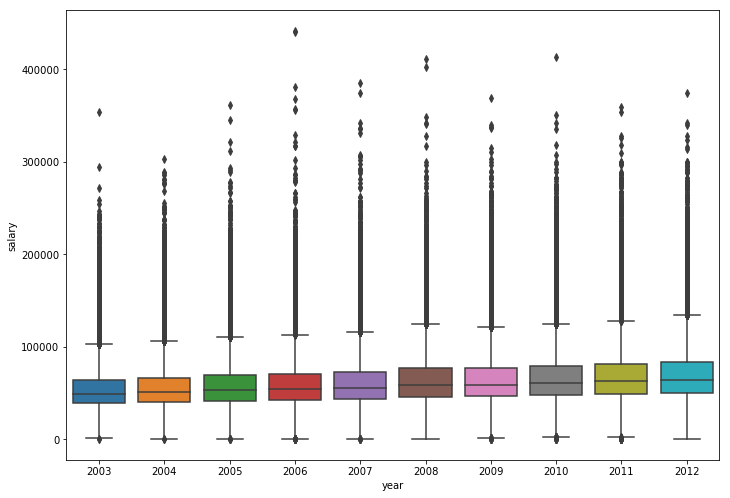

In [19]:
#Show boxplot of salaries by zipcode.
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x="year", y="salary", data=master_df)
plt.show()

In [20]:
#Install the CPI package to get current dollar values of salaries for comparisons over time.
#!pip install cpi
#import cpi

cpi.update()

cpi.inflate(100, 1950)

master_df.year=master_df.year.astype(int)

master_df['salary_adjusted'] = master_df.apply(lambda x: cpi.inflate(x.salary, x.year, to=2018), axis=1)

master_df.head()

,fy,rcdt,dst_name,dst_addr,dst_city,dst_st,dst_zip,dst_zip_plus4,sch_num,sch_name,...,assignment_5,assign5_desc,assignment_6,assign6_desc,assignment_7,assign7_desc,pct_admin,filename,year,salary_adjusted
0,2006,05016036002,Winnetka SD 36,1235 Oak St,Winnetka,IL,60093.0,2168,1005,Carleton W Washburne School,...,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,118995.571652
1,2006,34049220026,Barrington CUSD 220,310 James St,Barrington,IL,60010.0,3329,0004,Barrington High School,...,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,31101.893800
2,2006,31045046022,SD U-46,355 E Chicago St,Elgin,IL,60120.0,6543,1003,Abbott Middle School,...,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,86642.788830
3,2006,19022086017,Hinsdale Twp HSD 86,5500 S Grant St,Hinsdale,IL,60521.0,4578,0002,Hinsdale South High School,...,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,118514.171134
4,2006,05016028002,Northbrook SD 28,1475 Maple Ave,Northbrook,IL,60062.0,5418,2002,Greenbriar Elem School,...,0.0,missing,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,81883.800496


In [21]:
#Remove observations above $165,000.
master_df['salary_adjusted'].quantile([.1, .5, .75, .9, .95, .975, .99, 1])


0.100     44475.677115
0.500     68678.498683
0.750     89535.625031
0.900    109718.626021
0.950    126737.459085
0.975    142408.338977
0.990    162064.358068
1.000    550058.851607
Name: salary_adjusted, dtype: float64

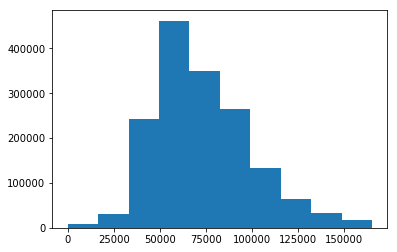

In [22]:

master_df=master_df.loc[master_df['salary_adjusted']<=165000]
master_df['salary_adjusted'].hist().grid(False)
plt.show()


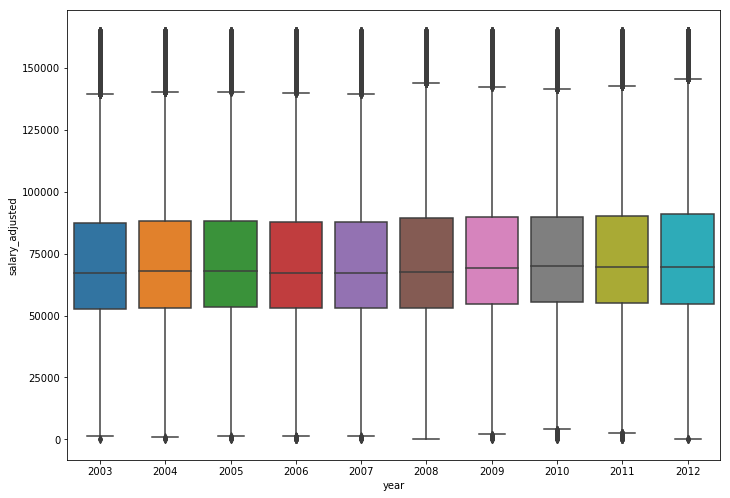

In [23]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
boxplot=sns.boxplot(x="year", y="salary_adjusted", data=master_df)
plt.show()

In [24]:
salaries_position=pd.pivot_table(data=master_df, index='pos_desc', values='salary_adjusted', aggfunc=[np.min, np.max, np.mean, lambda x: x.sem()*1.96])
salaries_position

/anaconda3/envs/python-data/lib/python2.7/site-packages/pandas/core/reshape/pivot.py:42: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


,amin,amax,mean,<lambda>
,salary_adjusted,salary_adjusted,salary_adjusted,salary_adjusted
Administrative Assistant,9121.459533,164597.557547,95616.512943,1560.490813
Adult Education,5247.317473,132176.447125,48907.566868,4590.798755
Assistant Director,11094.295878,164986.630769,107752.765472,1274.024988
Assistant Director of Special Ed,52497.608823,157491.754641,98961.660354,7303.259373
Assistant District Superintendent,6725.175551,164996.829544,136327.501233,1036.374300
Assistant Elementary Principal,4073.201173,164874.582156,110526.239542,500.284741
Assistant High School Principal,2183.539130,164971.840152,115295.382149,558.709639
Assistant Jr High/Middle Principal,12686.951869,164881.023027,95759.526845,507.836117
Assistant Regional Superintendent,2745.176353,147793.997725,87643.410301,3224.043657


In [25]:
#salaries_position=salaries_position.reset_index()
salaries_position.columns = salaries_position.columns.get_level_values(0)
salaries_position=salaries_position.rename(index=str, columns={'<lambda>':'error'})
salaries_position.sort_values(by='mean', ascending=True)

,amin,amax,mean,error
Intern Social Worker,8188.271739,75639.405838,36175.820936,17657.134368
Interpreter,17184.366651,65097.713773,38271.059732,9810.076233
Adult Education,5247.317473,132176.447125,48907.566868,4590.798755
Intern Psychologist,13737.872910,73561.208824,50036.240431,13349.930857
Audiologist,13280.012049,84623.059000,50930.605193,9583.496196
Prekindergarten,1326.204509,128453.774147,60143.833213,790.976362
Kindergarten,2229.876689,137389.851499,64025.597377,516.350487
Instructional Television,64920.712484,64920.712484,64920.712484,NaN
Elementary Teacher,18.660734,164966.847823,67175.375559,54.824823
Junior High/Middle Teacher,107.084602,164895.762089,67517.233201,95.186662


In [26]:
salaries_position=salaries_position[['mean', 'error']].sort_values(by='mean', ascending=True)
salaries_position

,mean,error
Intern Social Worker,36175.820936,17657.134368
Interpreter,38271.059732,9810.076233
Adult Education,48907.566868,4590.798755
Intern Psychologist,50036.240431,13349.930857
Audiologist,50930.605193,9583.496196
Prekindergarten,60143.833213,790.976362
Kindergarten,64025.597377,516.350487
Instructional Television,64920.712484,NaN
Elementary Teacher,67175.375559,54.824823
Junior High/Middle Teacher,67517.233201,95.186662


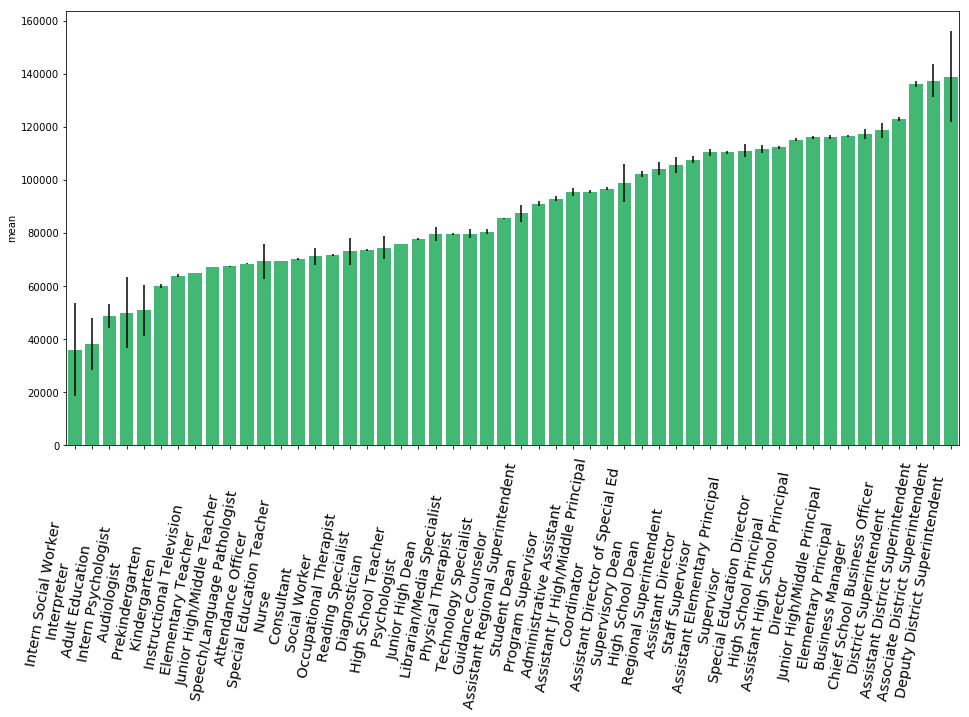

In [29]:
fig, ax = plt.subplots()

ax = sns.barplot(x=salaries_position.index, y="mean", yerr=salaries_position['error'], data=salaries_position, color="#2ecc71")

plt.xticks(
    rotation=80, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

fig.set_size_inches(16, 8)

plt.show()

In [33]:
master_df['teaching']=master_df['pos_desc']
master_df['teaching']=np.where(master_df['pos_desc'].str.contains('Teacher'), master_df['pos_desc'],
                              np.where(master_df['pos_desc'].str.contains('Kindergarten'), 'Kindergarten Teacher',
                                      np.where(master_df['pos_desc']=='Elementary', 'Elementary Teacher',
                                      'Other')))


master_df.teaching.value_counts()

Elementary Teacher                     574372
High School Teacher                    344744
Other                                  256948
Special Education Teacher              214076
Junior High/Middle Teacher             207009
Kindergarten Teacher                     5661
Name: teaching, dtype: int64

In [138]:
salaries_teachers=pd.pivot_table(data=master_df, index='teaching', values='salary_adjusted', aggfunc=[np.min, np.max, np.mean, np.std, len, lambda x: x.sem()*1.96])
salaries_teachers

,amin,amax,mean,std,len,<lambda>
,salary_adjusted,salary_adjusted,salary_adjusted,salary_adjusted,salary_adjusted,salary_adjusted
teaching,,,,,,
Elementary Teacher,18.660734,164966.847823,67175.375559,21199.118167,574372.0,54.824823
High School Teacher,1.093700,164987.782834,75949.800343,27505.474612,344744.0,91.817794
Junior High/Middle Teacher,107.084602,164895.762089,67517.233201,22096.049765,207009.0,95.186662
Kindergarten Teacher,2229.876689,137389.851499,64025.597377,19821.435214,5661.0,516.350487
Other,18.660734,164999.519977,89480.114892,31428.436155,256948.0,121.522368
Special Education Teacher,0.046063,164961.772638,69529.395641,23008.020942,214076.0,97.465596


In [139]:
salaries_teachers.columns = salaries_teachers.columns.get_level_values(0)
salaries_teachers=salaries_teachers.rename(index=str, columns={'<lambda>':'error'})
salaries_teachers.sort_values(by='mean', ascending=True)


,amin,amax,mean,std,len,error
teaching,,,,,,
Kindergarten Teacher,2229.876689,137389.851499,64025.597377,19821.435214,5661.0,516.350487
Elementary Teacher,18.660734,164966.847823,67175.375559,21199.118167,574372.0,54.824823
Junior High/Middle Teacher,107.084602,164895.762089,67517.233201,22096.049765,207009.0,95.186662
Special Education Teacher,0.046063,164961.772638,69529.395641,23008.020942,214076.0,97.465596
High School Teacher,1.093700,164987.782834,75949.800343,27505.474612,344744.0,91.817794
Other,18.660734,164999.519977,89480.114892,31428.436155,256948.0,121.522368


In [145]:
#salaries_teachers=salaries_teachers.reset_index()
salaries_teachers['teaching']=salaries_teachers.astype(str)
for i in salaries_teachers.teaching.unique():
    print i,'--',ttest(salaries_teachers, 'teaching', i, 'Other')


Elementary Teacher                  -- 0.0
High School Teacher                 -- 0.0
Junior High/Middle Teacher          -- 0.0
Kindergarten Teacher -- 0.0
Other -- 1
Special Education Teacher           -- 0.0


In [39]:
salaries_teachers=salaries_teachers[['mean', 'error']].sort_values(by='mean', ascending=True)
salaries_teachers

,mean,error
teaching,,
Kindergarten Teacher,64025.597377,516.350487
Elementary Teacher,67175.375559,54.824823
Junior High/Middle Teacher,67517.233201,95.186662
Special Education Teacher,69529.395641,97.465596
High School Teacher,75949.800343,91.817794
Other,89480.114892,121.522368


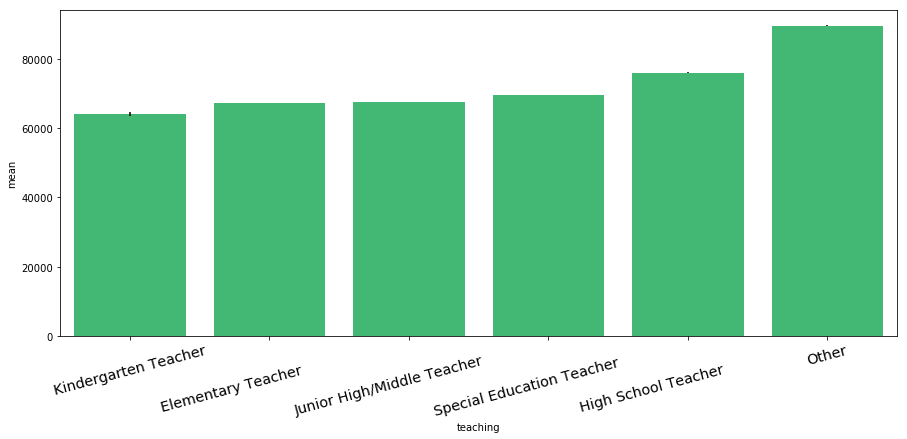

In [56]:
fig, ax = plt.subplots()

ax = sns.barplot(x=salaries_teachers.index, y="mean", yerr=salaries_teachers['error'], data=salaries_teachers, color="#2ecc71")

plt.xticks(
    rotation=15, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'  
)

fig.set_size_inches(15, 6)

plt.show()

In [57]:
salaries_year=pd.pivot_table(data=master_df, index='year', values='salary_adjusted', aggfunc=[np.min, np.max, np.median, np.mean, np.std, lambda x: x.sem(), len])
salaries_year.columns = salaries_year.columns.get_level_values(0)
salaries_year=salaries_year.rename(index=str, columns={'<lambda>':'std_error'})
salaries_year=salaries_year.reset_index()
salaries_year



,year,amin,amax,median,mean,std,std_error,len
0,2003,54.588478,164971.840152,67211.941035,72122.845134,26168.546305,65.846627,157940.0
1,2004,93.051826,164988.279116,67892.819172,72741.212349,26486.618531,66.911647,156693.0
2,2005,128.575013,164997.742427,67975.037768,72810.773094,26387.599563,66.165721,159050.0
3,2006,51.068388,164999.519977,67290.697262,72024.512388,26150.984314,65.694172,158461.0
4,2007,108.996875,164974.666120,67130.018567,71993.991515,25865.217215,65.248004,157144.0
5,2008,18.660734,164987.782834,67712.805702,72453.366729,26226.763395,65.041983,162593.0
6,2009,42.136564,164966.379778,69001.362191,73512.194329,25785.398660,63.436410,165223.0
7,2010,0.046063,164979.818638,69866.685715,74242.579635,25825.980364,63.630286,164735.0
8,2011,58.283786,164992.120563,69693.660039,73925.168941,25749.933162,64.252068,160612.0
9,2012,1.093700,164929.987717,69638.603079,73935.466541,26122.609891,65.233382,160359.0


In [148]:
#Test for differences above. Compare all years to 2012.
from scipy import stats

def ttest(data, groupvar, group1, group2):
    new_data=data.copy()
    new_data=new_data.loc[(new_data[groupvar]==group1)|(new_data[groupvar]==group2)]
    new_data['stdsq']=new_data['std']**2
    new_data['error']=new_data['stdsq']/new_data['len']
    denominator=np.sqrt(new_data['error'].sum())
    mean_diff=new_data['mean'].diff()
    t_stat=mean_diff/denominator
    df=data['len'].min()-1
    pval = stats.t.sf(np.abs(t_stat), df)*2
    if len(pval)>1:
        return pval[1]
    else:
        return 1
    

for i in salaries_year.year.unique():
    print i,'--',ttest(salaries_year, 'year', i, '2012')


 2003 -- 4.631716711530944e-85
2004 -- 2.218119797432353e-37
2005 -- 1.0354236482524287e-33
2006 -- 1.5711783548491915e-94
2007 -- 3.6621935972393367e-98
2008 -- 3.392133618602107e-58
2009 -- 3.2940782424154697e-06
2010 -- 0.0007514538074317892
2011 -- 0.9104548277560247
2012 -- 1


In [59]:
#fig, ax = plt.subplots()
#fig.set_size_inches(11.7, 8.27)
#sns.boxplot(x="race_ethnicity_cd", y="salary", data=master_df)
salaries_race=pd.pivot_table(data=master_df, index='race_ethnicity_desc', values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
salaries_race['standard_error']=salaries_race['std']/np.sqrt(salaries_race['len'])
salaries_race.columns = salaries_race.columns.get_level_values(0)
salaries_race=salaries_race.reset_index()
salaries_race

,race_ethnicity_desc,amin,amax,median,mean,std,len,standard_error
0,American Indian or Alaska Native,19495.40,147855.00,70022.640,70766.991186,19525.474619,506.0,868.013223
1,American Indian or Alaskan Native,41.00,142128.00,57286.625,58441.812558,16635.868916,1976.0,374.241564
2,Asian,2430.00,148339.23,65447.510,67696.070515,21300.547469,3767.0,347.050725
3,Asian or Pacific Islander,309.00,142227.00,56161.530,59000.348100,19458.413246,14363.0,162.362168
4,Black or African American,190.00,150732.00,77578.115,75863.335528,22502.688066,24162.0,144.766462
5,"Black, Non-Hispanic",38.00,142909.00,67211.105,67666.910761,20601.658032,118716.0,59.792615
6,Hispanic,186.00,142300.37,57801.190,60448.439531,19501.876928,55228.0,82.984456
7,Hispanic or Latino,52.21,150732.00,68390.305,69940.002045,21273.190178,15542.0,170.639343
8,Native Hawaiian or Other Pacific Islander,6887.74,129173.57,65226.620,66548.750000,22305.134592,270.0,1357.447263
9,Two or More Races,4497.00,147682.08,67428.750,69416.124408,21259.155179,2364.0,437.242396


In [60]:
p_values=[]

for i in salaries_race.race_ethnicity_desc.unique():
    
    if i!='Black, Non-Hispanic':
        print (i)
        print ("---------")
        pval=(ttest(salaries_race, 'race_ethnicity_desc', i, 'Black or African American'))
        p_values.append(pval)

        


American Indian or Alaska Native
---------
American Indian or Alaskan Native
---------
Asian
---------
Asian or Pacific Islander
---------
Black or African American
---------
Hispanic
---------
Hispanic or Latino
---------
Native Hawaiian or Other Pacific Islander
---------
Two or More Races
---------
Unknown
---------
White
---------
White, Non-Hispanic
---------
missing
---------


In [61]:
multi.multipletests(p_values, alpha=.05)

(array([ True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True]),
 array([3.88933125e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.76416881e-10,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]),
 0.0039378642276444165,
 0.0038461538461538464)

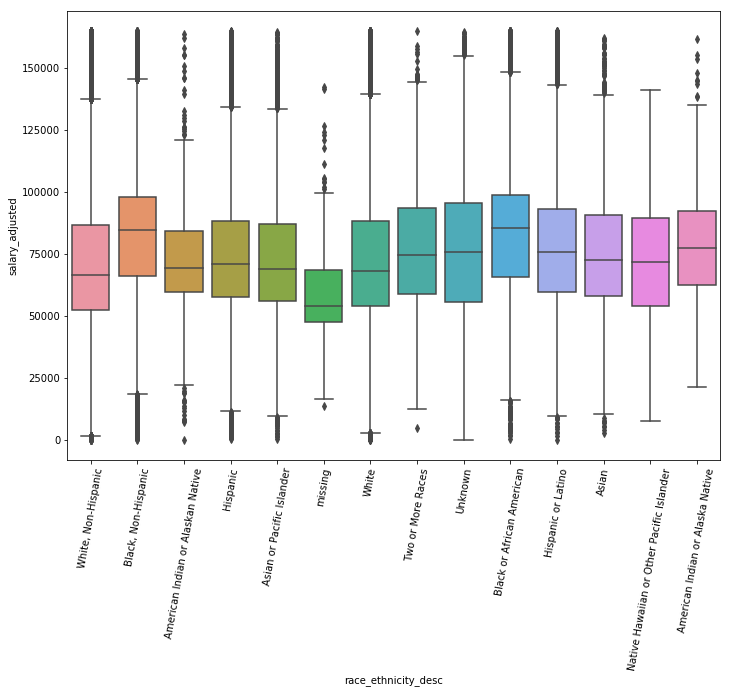

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
plt.xticks(rotation=80)
boxplot=sns.boxplot(x="race_ethnicity_desc", y="salary_adjusted", data=master_df)
plt.show()

In [63]:
race_teacher_experience=pd.pivot_table(data=master_df, index='race_ethnicity_desc', values='state_exp', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
race_teacher_experience['standard_error']=race_teacher_experience['std']/np.sqrt(race_teacher_experience['len'])
race_teacher_experience
race_teacher_experience.columns = race_teacher_experience.columns.get_level_values(0)
race_teacher_experience=race_teacher_experience.reset_index()
race_teacher_experience

,race_ethnicity_desc,amin,amax,median,mean,std,len,standard_error
0,American Indian or Alaska Native,1.0,40.0,10.0,11.569170,7.464116,506.0,0.331820
1,American Indian or Alaskan Native,1.0,42.0,6.0,8.685425,7.332967,1976.0,0.164963
2,Asian,0.1,45.0,8.0,9.594691,7.266962,3767.0,0.118401
3,Asian or Pacific Islander,0.2,44.0,7.0,9.105145,8.030979,14363.0,0.067011
4,Black or African American,0.5,56.0,13.0,14.823417,9.868207,24162.0,0.063485
5,"Black, Non-Hispanic",0.0,55.0,14.0,15.778706,10.728530,118716.0,0.031138
6,Hispanic,0.4,45.0,8.0,10.142225,7.840089,55228.0,0.033361
7,Hispanic or Latino,0.5,53.0,10.0,11.288689,7.816479,15542.0,0.062699
8,Native Hawaiian or Other Pacific Islander,1.0,39.0,10.0,11.281481,8.115135,270.0,0.493871
9,Two or More Races,1.0,44.0,10.0,11.756768,8.321664,2364.0,0.171154


In [64]:
race_teacher_experience_pivoted=race_teacher_experience.pivot_table(columns='race_ethnicity_desc')
race_teacher_experience_pivoted
#matrix=race_teacher_experience_pivoted.corr()
#for col in matrix.columns:
    #matrix[col].values[:] = 0
    
#group1=[i for i in race_teacher_experience_pivoted.columns]
#group2=[t for t in race_teacher_experience_pivoted.columns]

#for i in group1:
    #for j in group2:
        #pval=ttest(race_teacher_experience, 'race_ethnicity_desc', i, j)
        #matrix.at[i,j]=pval

#matrix           

race_ethnicity_desc,American Indian or Alaska Native,American Indian or Alaskan Native,Asian,Asian or Pacific Islander,Black or African American,"Black, Non-Hispanic",Hispanic,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,Two or More Races,Unknown,White,"White, Non-Hispanic",missing
amax,40.000000,42.000000,45.000000,44.000000,56.000000,55.000000,45.000000,53.000000,39.000000,44.000000,48.000000,57.000000,5.900000e+01,38.000000
amin,1.000000,1.000000,0.100000,0.200000,0.500000,0.000000,0.400000,0.500000,1.000000,1.000000,0.100000,0.100000,0.000000e+00,0.000000
len,506.000000,1976.000000,3767.000000,14363.000000,24162.000000,118716.000000,55228.000000,15542.000000,270.000000,2364.000000,6097.000000,268260.000000,1.091231e+06,328.000000
mean,11.569170,8.685425,9.594691,9.105145,14.823417,15.778706,10.142225,11.288689,11.281481,11.756768,11.905330,13.116926,1.321806e+01,5.158537
median,10.000000,6.000000,8.000000,7.000000,13.000000,14.000000,8.000000,10.000000,10.000000,10.000000,10.000000,11.000000,1.100000e+01,3.000000
standard_error,0.331820,0.164963,0.118401,0.067011,0.063485,0.031138,0.033361,0.062699,0.493871,0.171154,0.117593,0.017421,9.442614e-03,0.313417
std,7.464116,7.332967,7.266962,8.030979,9.868207,10.728530,7.840089,7.816479,8.115135,8.321664,9.182041,9.022943,9.863943e+00,5.676217


In [65]:
p_values=[]

for i in race_teacher_experience.race_ethnicity_desc.unique():
    
    if i!='White, Non-Hispanic':
        print (i)
        print ("---------")
        pval=(ttest(race_teacher_experience, 'race_ethnicity_desc', i, 'White, Non-Hispanic'))
        p_values.append(pval)


American Indian or Alaska Native
---------
American Indian or Alaskan Native
---------
Asian
---------
Asian or Pacific Islander
---------
Black or African American
---------
Black, Non-Hispanic
---------
Hispanic
---------
Hispanic or Latino
---------
Native Hawaiian or Other Pacific Islander
---------
Two or More Races
---------
Unknown
---------
White
---------
missing
---------


In [66]:
multi.multipletests(p_values, alpha=.05)

(array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True]),
 array([2.41798130e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.12190703e-04, 4.44089210e-15, 0.00000000e+00, 1.89161679e-06,
        0.00000000e+00]),
 0.0039378642276444165,
 0.0038461538461538464)

In [67]:
#Recode race_ethnicity_desc so the groups are coded properly.

d_race={'American Indian or Alaska Native': 'American Indian or Alaskan Native'}

#Map to the race_ethnicity_desc variable now.

master_df=master_df.replace({"race_ethnicity_desc": d_race})
master_df.race_ethnicity_desc.value_counts()

White, Non-Hispanic                          1091231
White                                         268260
Black, Non-Hispanic                           118716
Hispanic                                       55228
Black or African American                      24162
Hispanic or Latino                             15542
Asian or Pacific Islander                      14363
Unknown                                         6097
Asian                                           3767
American Indian or Alaskan Native               2482
Two or More Races                               2364
missing                                          328
Native Hawaiian or Other Pacific Islander        270
Name: race_ethnicity_desc, dtype: int64

In [68]:
race_teacher_experience=pd.pivot_table(data=master_df, index='race_ethnicity_desc', values='state_exp', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
race_teacher_experience['standard_error']=race_teacher_experience['std']/np.sqrt(race_teacher_experience['len'])
race_teacher_experience
race_teacher_experience.columns = race_teacher_experience.columns.get_level_values(0)
race_teacher_experience=race_teacher_experience.reset_index()
race_teacher_experience

,race_ethnicity_desc,amin,amax,median,mean,std,len,standard_error
0,American Indian or Alaskan Native,1.0,42.0,7.0,9.273328,7.449565,2482.0,0.149531
1,Asian,0.1,45.0,8.0,9.594691,7.266962,3767.0,0.118401
2,Asian or Pacific Islander,0.2,44.0,7.0,9.105145,8.030979,14363.0,0.067011
3,Black or African American,0.5,56.0,13.0,14.823417,9.868207,24162.0,0.063485
4,"Black, Non-Hispanic",0.0,55.0,14.0,15.778706,10.728530,118716.0,0.031138
5,Hispanic,0.4,45.0,8.0,10.142225,7.840089,55228.0,0.033361
6,Hispanic or Latino,0.5,53.0,10.0,11.288689,7.816479,15542.0,0.062699
7,Native Hawaiian or Other Pacific Islander,1.0,39.0,10.0,11.281481,8.115135,270.0,0.493871
8,Two or More Races,1.0,44.0,10.0,11.756768,8.321664,2364.0,0.171154
9,Unknown,0.1,48.0,10.0,11.905330,9.182041,6097.0,0.117593


In [69]:
race_teacher_exp=race_teacher_experience[['race_ethnicity_desc', 'mean', 'standard_error']]
race_teacher_exp['error']=1.96*race_teacher_exp['standard_error']
race_teacher_exp=race_teacher_exp.sort_values(by='mean', ascending=True)

/anaconda3/envs/python-data/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
race_teacher_exp.dtypes

race_ethnicity_desc     object
mean                   float64
standard_error         float64
error                  float64
dtype: object

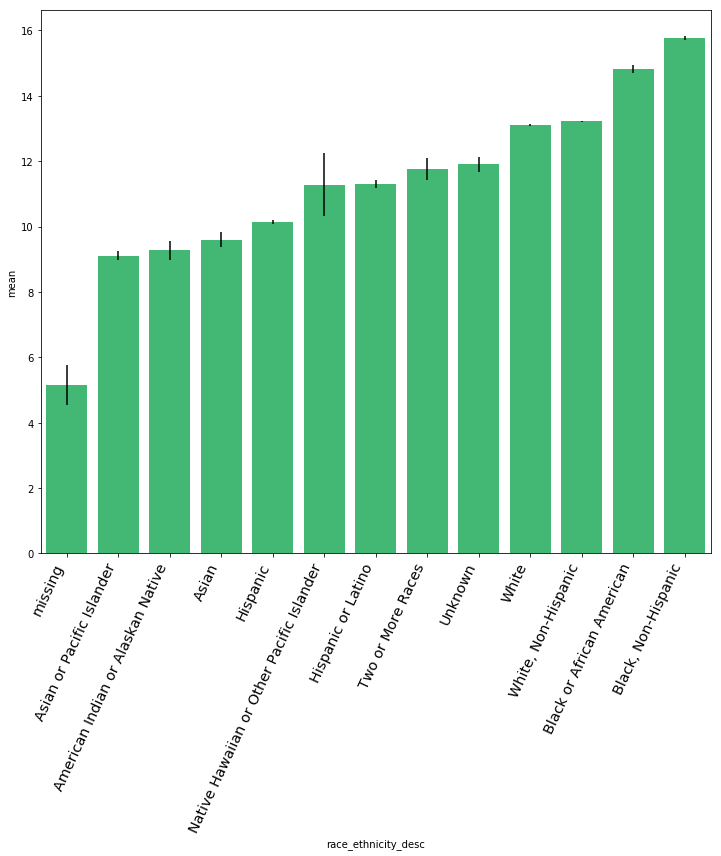

In [71]:
fig, ax = plt.subplots()

ax = sns.barplot(x='race_ethnicity_desc', y="mean", yerr=race_teacher_exp['error'], data=race_teacher_exp, color="#2ecc71")

plt.xticks(
    rotation=65, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

fig.set_size_inches(12, 10)

plt.show()

In [72]:
gender_teacher_experience=pd.pivot_table(data=master_df, index='gender', values='state_exp', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
gender_teacher_experience['standard_error']=gender_teacher_experience['std']/np.sqrt(gender_teacher_experience['len'])
gender_teacher_experience.columns = gender_teacher_experience.columns.get_level_values(0)
gender_teacher_experience=gender_teacher_experience.reset_index()
gender_teacher_experience

,gender,amin,amax,median,mean,std,len,standard_error
0,,1.0,4.0,2.5,2.333333,1.211060,6.0,0.494413
1,F,0.0,59.0,11.0,13.080445,9.574324,1231548.0,0.008627
2,M,0.0,57.0,11.0,13.724973,10.265611,371256.0,0.016848


In [73]:
ttest(gender_teacher_experience, 'gender', 'F', 'M')

4.108370795025619e-07

In [74]:
gender_race=pd.pivot_table(data=master_df, index=['race_ethnicity_desc', 'gender'], values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len, lambda x: x.sem()])
#gender_race['standard_error']=gender_race['std']/np.sqrt(gender_race['len'])
gender_race.columns=gender_race.columns.get_level_values(0)
gender_race=gender_race.rename(index=str, columns={'<lambda>': 'std_error'}).reset_index()
gender_race=gender_race[['race_ethnicity_desc', 'gender', 'mean', 'std_error']]
gender_race['error']=1.96*gender_race['std_error']
gender_race=gender_race.loc[gender_race['race_ethnicity_desc']!='Unknown']
gender_race=gender_race.loc[gender_race['race_ethnicity_desc']!='missing']

gender_race


,race_ethnicity_desc,gender,mean,std_error,error
0,American Indian or Alaskan Native,F,60414.703778,398.077459,780.231820
1,American Indian or Alaskan Native,M,62651.472354,812.491688,1592.483709
2,Asian,F,66709.849640,387.974434,760.429891
3,Asian,M,70805.873936,753.322439,1476.511980
4,Asian or Pacific Islander,F,57723.470140,183.079656,358.836126
5,Asian or Pacific Islander,M,62891.066125,339.014104,664.467644
6,Black or African American,F,75894.603318,157.028028,307.774934
7,Black or African American,M,75727.088388,365.183957,715.760556
8,"Black, Non-Hispanic",F,67593.918638,65.202581,127.797058
9,"Black, Non-Hispanic",M,67989.975718,148.225548,290.522074


In [75]:
gender_race.dtypes

race_ethnicity_desc     object
gender                  object
mean                   float64
std_error              float64
error                  float64
dtype: object

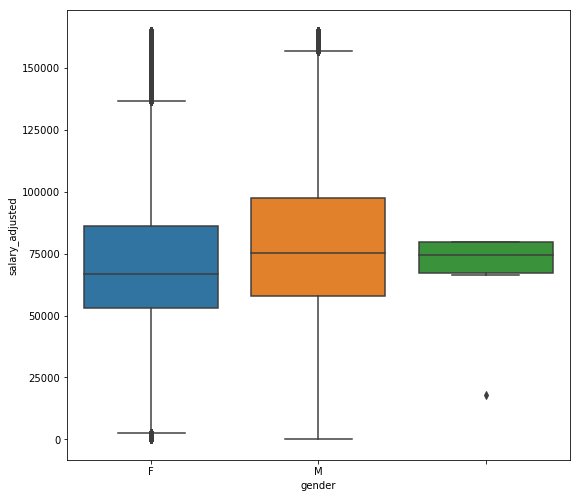

In [76]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(9, 8.27)
sns.boxplot(x="gender", y="salary_adjusted", data=master_df)
plt.show()

In [77]:
master_df['pos_desc']=master_df['pos_desc'].astype(str)
master_df['pos_desc']=master_df['pos_desc'].str.strip()

positions=['Elementary Teacher', 'Special Education Teacher', 'High School Teacher', 'Junior High/Middle Teacher',
          'Kindergarten', 'Prekindergarten']

data=master_df.loc[master_df['pos_desc'].isin(positions)]

data.pos_desc

0          Junior High/Middle Teacher
2          Junior High/Middle Teacher
3                 High School Teacher
4                  Elementary Teacher
5          Junior High/Middle Teacher
6                 High School Teacher
7                 High School Teacher
8                 High School Teacher
9          Junior High/Middle Teacher
10                High School Teacher
11                High School Teacher
12                High School Teacher
13                High School Teacher
14         Junior High/Middle Teacher
15                High School Teacher
16                 Elementary Teacher
18          Special Education Teacher
19                 Elementary Teacher
21         Junior High/Middle Teacher
22                 Elementary Teacher
23                High School Teacher
25                 Elementary Teacher
26          Special Education Teacher
27                 Elementary Teacher
30                High School Teacher
31                High School Teacher
32          

In [78]:
data.pos_desc.value_counts()

Elementary Teacher            574372
High School Teacher           344744
Special Education Teacher     214076
Junior High/Middle Teacher    207009
Kindergarten                    5661
Prekindergarten                 3075
Name: pos_desc, dtype: int64

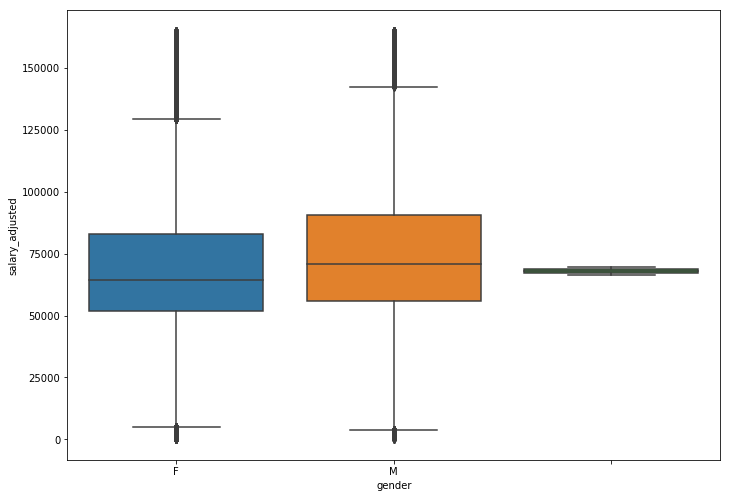

In [79]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x="gender", y="salary_adjusted", data=data)
plt.show()

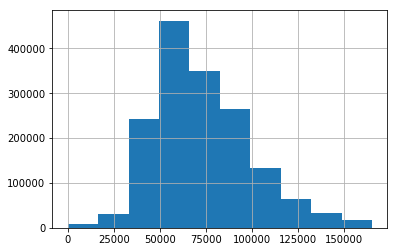

In [80]:
master_df.salary_adjusted.hist()
plt.show()

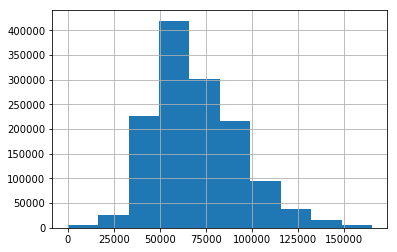

In [81]:
data.salary_adjusted.hist()
plt.show()

In [82]:
#Let's look at scatterplots of all floating point variables with our outcome, salary.
vars1=[i for i in master_df.columns if master_df[i].dtype=='float64']
vars1=[i for i in vars1 if 'zip' not in i]
vars1

['salary',
 'dist_exp',
 'state_exp',
 'out_of_state_exp',
 'assignment_2',
 'assignment_3',
 'assignment_4',
 'assignment_5',
 'assignment_6',
 'assignment_7',
 'pct_admin',
 'salary_adjusted']

salary


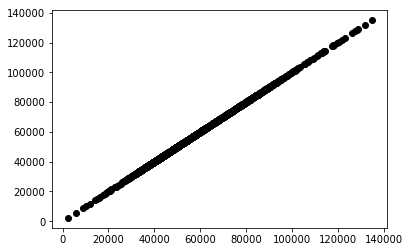

dist_exp


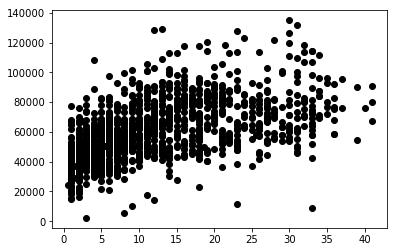

state_exp


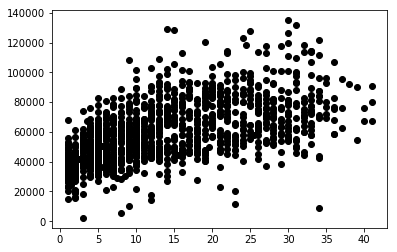

out_of_state_exp


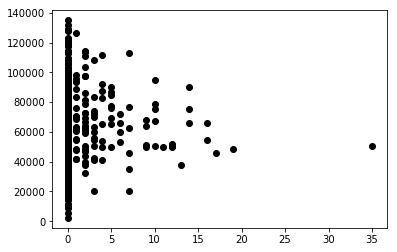

assignment_2


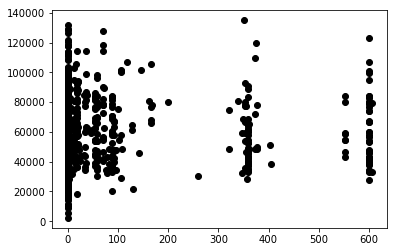

assignment_3


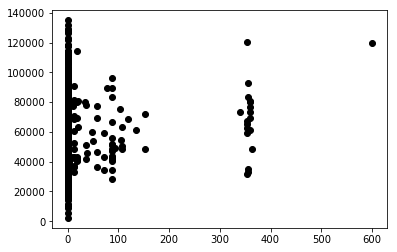

assignment_4


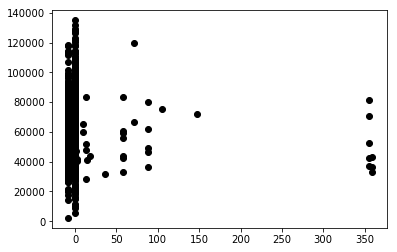

assignment_5


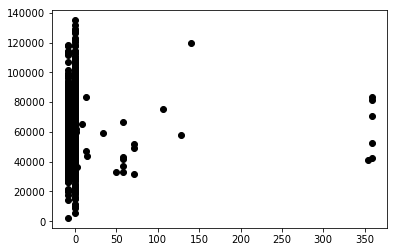

assignment_6


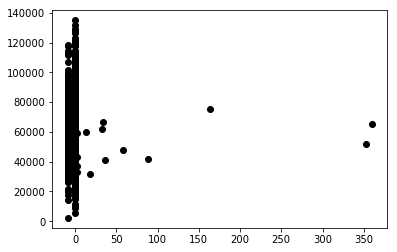

assignment_7


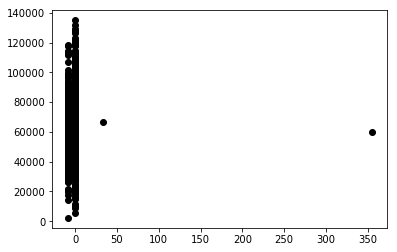

pct_admin


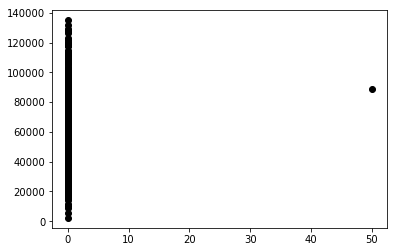

salary_adjusted


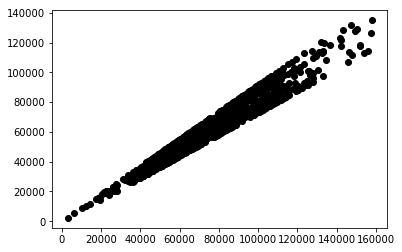

In [83]:
#Take a sample of the data to plot.
sample=data.sample(frac=.001)

for i in vars1:
    print (i)
    x=sample[i]
    y=sample['salary']
    plt.plot(x, y, 'o', color='black')
    plt.show()

In [84]:
corr=data.corr()

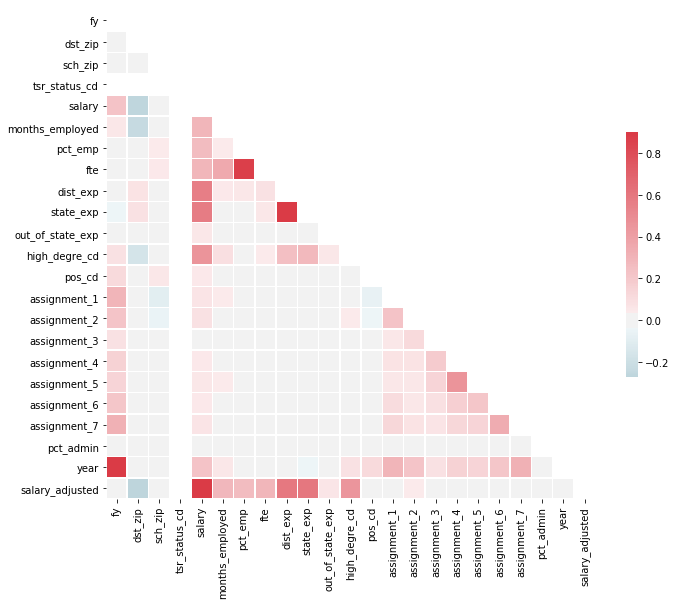

In [85]:

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [86]:
len(master_df), len(data)

(1602810, 1348937)

In [87]:
data.high_degre_desc.value_counts()

Masters                                   707660
Baccalaureate                             630242
Doctorate                                   6219
None                                        3607
C.A.S., Specialist, 6 Year Certificate      1008
Registered Nurse                             199
missing                                        2
Name: high_degre_desc, dtype: int64

In [88]:
#Show one last table.  Interested in gender, education, and salary. 
gender_ed=pd.pivot_table(data=data, index=['high_degre_desc', 'gender'], values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
gender_ed['standard_error']=gender_ed['std']/np.sqrt(gender_ed['len'])
gender_ed

amin       amax  \
                                                 salary     salary   
high_degre_desc                        gender                        
Baccalaureate                          F           1.00  147252.72   
                                       M          50.00  146895.96   
C.A.S., Specialist, 6 Year Certificate F       13875.51  136766.88   
                                       M         175.00  144241.75   
Doctorate                              F         216.00  149747.16   
                                       M        1539.35  147424.00   
Masters                                        59375.00   59375.00   
                                       F           0.04  150733.89   
                                       M          52.21  150622.84   
None                                           60533.00   60533.00   
                                       F         997.50  130612.00   
                                       M         705.00  104411.00   
Registered Nurse                       F        2414.67   73191.25   
                                       M        3051.02   49320.00   
missing                                F       27420.00   27420.00   
                                       M       68093.00   68093.00   

                                                    median          mean  \
                                                    salary        salary   
high_degre_desc                        gender                              
Baccalaureate                          F       44776.46500  46934.788456   
                                       M       48093.00000  50226.939684   
C.A.S., Specialist, 6 Year Certificate F       73706.00000  74295.456973   
                                       M       77806.69000  78500.475290   
Doctorate                              F       77588.50000  76881.693038   
                                       M       75010.18000  75997.523284   
Masters                                        59375.00000  59375.000000   
                                       F       63325.58000  65178.260906   
                                       M       69834.58000  72442.438298   
None                                           60533.00000  60533.000000   
                                       F       40402.87000  41200.261317   
                                       M       45139.68355  46073.960269   
Registered Nurse                       F       33440.61000  32683.482381   
                                       M       40705.00000  35879.669000   
missing                                F       27420.00000  27420.000000   
                                       M       68093.00000  68093.000000   

                                                        std       len  \
                                                     salary    salary   
high_degre_desc                        gender                           
Baccalaureate                          F       14020.146905  490736.0   
                                       M       14650.819435  139506.0   
C.A.S., Specialist, 6 Year Certificate F       21580.348603     600.0   
                                       M       23645.360133     408.0   
Doctorate                              F       22686.859175    3776.0   
                                       M       25179.997860    2443.0   
Masters                                                 NaN       1.0   
                                       F       19296.376151  544825.0   
                                       M       22302.926683  162834.0   
None                                                    NaN       1.0   
                                       F       15636.169871    1424.0   
                                       M       16544.968128    2182.0   
Registered Nurse                       F       18031.323525     189.0   
                                       M       13293.332497      10.0   
missing                           

In [89]:
bins = [0, 5, 10, 20, 40, 60]
labels = ["0-5 years","6-10 years","11-20 years", "21-40 years", "40-60 years"]
data['years_exp_state'] = pd.cut(data['state_exp'], bins=bins, labels=labels)
data.years_exp_state.value_counts()

/anaconda3/envs/python-data/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0-5 years      389118
11-20 years    366906
6-10 years     300225
21-40 years    289592
40-60 years      3060
Name: years_exp_state, dtype: int64

In [90]:
exp_ed_gender=pd.pivot_table(data=data, index=['high_degre_desc', 'years_exp_state', 'gender'], values='salary', aggfunc=[np.min, np.max, np.median, np.mean, np.std, len])
exp_ed_gender

amin  \
                                                                 salary   
high_degre_desc                        years_exp_state gender             
Baccalaureate                          0-5 years       F           1.00   
                                                       M          57.00   
                                       11-20 years     F          32.00   
                                                       M         176.00   
                                       21-40 years     F         102.70   
                                                       M         808.00   
                                       40-60 years     F        2160.00   
                                                       M        2659.00   
                                       6-10 years      F          70.00   
                                                       M         592.50   
C.A.S., Specialist, 6 Year Certificate 0-5 years       F       17583.11   
                                                       M       22348.00   
                                       11-20 years     F       13875.51   
                                                       M         175.00   
                                       21-40 years     F       14374.80   
                                                       M        2214.81   
                                       40-60 years     F       85212.70   
                                       6-10 years      F       28858.00   
                                                       M       19890.69   
Doctorate                              0-5 years       F         216.00   
                                                       M        4209.64   
                                       11-20 years     F        4286.00   
                                                       M       11856.37   
                                       21-40 years     F        1125.00   
                                                       M        3666.00   
                                       40-60 years     F       47606.98   
                                                       M       12112.00   
                                       6-10 years      F        8424.00   
                                                       M        1539.35   
Masters                                0-5 years               59375.00   
                                                       F           1.00   
                                                       M          52.21   
                                       11-20 years     F          92.99   
                                                       M         330.00   
                                       21-40 years     F           0.04   
                                                       M         150.00   
                                       40-60 years     F        4000.00   
                                                       M        2512.00   
                                       6-10 years      F         143.38   
                                                       M         186.00   
None                                   0-5 years               60533.00   
                                                       F        1225.00   
                                                       M         705.00   
                                       11-20 years     F        4787.43   
                                                       M        8306.69   
                                       21-40 years     F        2207.51   
                                                       M        3304.50   
                                       40-60 years     F       87009.00   
                                                       M       56232.11   
                                       6-10 years      F         997.50   
                                                       M        2341.08   
Registered Nurse 

In [92]:
#Read in income by zip code level.

income_zip=pd.read_excel('/Users/jonathan.phelan/Downloads/MedianZIP-3.xlsx')
income_zip.head()

,Zip,Median,Mean,Pop
0,1001,56662.5735,66687.8,16445
1,1002,49853.4177,75062.6,28069
2,1003,28462.0000,35121,8491
3,1005,75423.0000,82442,4798
4,1007,79076.3540,85802,12962


In [93]:
income_zip['Zip']=income_zip['Zip'].astype(float)

In [94]:
income_zip["Mean"] = pd.to_numeric(income_zip.Mean, errors='coerce')


In [95]:
income_zip.describe()

,Zip,Median,Mean,Pop
count,32634.000000,32634.000000,32627.000000,32634.000000
mean,49875.280750,50938.205509,63452.186741,9192.768187
std,27382.476498,20356.270751,26463.006499,13416.240474
min,1001.000000,32.982400,53.616000,1.000000
25%,27301.250000,38462.000000,48593.189000,736.000000
50%,49875.000000,46503.319500,56949.604700,2756.000000
75%,72133.500000,58255.496175,70341.169450,12512.750000
max,99929.000000,223106.175000,361842.268400,113916.000000


In [96]:
data=pd.merge(income_zip, data, left_on='Zip', right_on='sch_zip', how='inner')
data.head()

,Zip,Median,Mean,Pop,fy,rcdt,dst_name,dst_addr,dst_city,dst_st,...,assignment_6,assign6_desc,assignment_7,assign7_desc,pct_admin,filename,year,salary_adjusted,teaching,years_exp_state
0,60002.0,78051.555,87531.7847,24299,2006,34049034004,Antioch CCSD 34,964 Spafford St,Antioch,IL,...,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,53073.756300,Special Education Teacher,11-20 years
1,60002.0,78051.555,87531.7847,24299,2006,34049117016,CHSD 117,1625 Deep Lake Rd,Lake Villa,IL,...,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,90340.875000,High School Teacher,11-20 years
2,60002.0,78051.555,87531.7847,24299,2006,34049034004,Antioch CCSD 34,964 Spafford St,Antioch,IL,...,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,62069.303359,Elementary Teacher,11-20 years
3,60002.0,78051.555,87531.7847,24299,2006,34049034004,Antioch CCSD 34,964 Spafford St,Antioch,IL,...,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,60260.735085,Special Education Teacher,6-10 years
4,60002.0,78051.555,87531.7847,24299,2006,34049034004,Antioch CCSD 34,964 Spafford St,Antioch,IL,...,0.0,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,54328.083096,Elementary Teacher,6-10 years


In [97]:
#Create categories for zip code income.

cut_points=[0, 25000, 50000, 75000, 100000]
labels = ["0-$25,000","$25-$50,000","$50-$75,000", "$75-$100,000"]

data['income_bucket'] = pd.cut(data['Median'], bins=cut_points, labels=labels)
data.income_bucket.value_counts()

$25-$50,000     478660
$50-$75,000     455503
$75-$100,000    248739
0-$25,000        21261
Name: income_bucket, dtype: int64

In [98]:
pd.crosstab(data['gender'], data['income_bucket']).apply(lambda r: r/r.sum(), axis=1)

income_bucket,"0-$25,000","$25-$50,000","$50-$75,000","$75-$100,000"
gender,,,,
,0.000000,1.000000,0.000000,0.000000
F,0.017931,0.395973,0.378760,0.207336
M,0.016736,0.402630,0.376646,0.203988


In [99]:
cut_points=[0, 25000, 50000, 75000, 100000, np.inf]
labels = ["0-$25,000","$25-$50,000","$50-$75,000", "$75-$100,000", "Greater_100k"]
data['salary_bucket'] = pd.cut(data['salary_adjusted'], bins=cut_points, labels=labels)
data.salary_bucket.value_counts()

$50-$75,000     569503
$75-$100,000    336328
$25-$50,000     239695
Greater_100k    139437
0-$25,000        14504
Name: salary_bucket, dtype: int64

In [100]:
salary_groups=pd.pivot_table(data=data, index=['gender', 'salary_bucket'], values='salary_adjusted', aggfunc=[np.mean, len, lambda x: x.sem()])
salary_groups.columns=salary_groups.columns.get_level_values(level=0)
salary_groups
            

mean       len     <lambda>
gender salary_bucket                                      
       $50-$75,000     67850.511043       2.0  1645.557817
F      0-$25,000       17443.931914   11772.0    56.671551
       $25-$50,000     43140.070964  198071.0    12.039787
       $50-$75,000     61588.948184  446053.0    10.480165
       $75-$100,000    86442.820675  253041.0    14.086234
       Greater_100k   114273.602534   90388.0    43.132228
M      0-$25,000       16377.120956    2732.0   122.638993
       $25-$50,000     43572.440303   41624.0    25.311559
       $50-$75,000     62192.969825  123448.0    20.034521
       $75-$100,000    86556.197067   83287.0    24.610945
       Greater_100k   120154.080689   49049.0    71.616910

In [101]:
grouped_errors=pd.pivot_table(data=data, index='assign1_desc', values='salary', aggfunc=[np.mean, lambda x: x.sem(), len])

In [102]:
grouped_errors.columns=grouped_errors.columns.get_level_values(level=0)

In [103]:
grouped_errors=grouped_errors.rename(index=str, columns={'mean': 'mean_salary', '<lambda>':'std_err', 'len':'counts'})
#grouped_errors['upper_95_ci']=grouped_errors.mean_salary+(1.96*(grouped_errors['se']))
#grouped_errors['lower_95_ci']=grouped_errors.mean_salary-(1.96*(grouped_errors['se']))



#grouped_errors.to_csv('subject_salaries_gender.csv')

In [104]:
grouped_errors.sort_values(by='counts', ascending=False)

,mean_salary,std_err,counts
Elementary Self Contained (K-5 Only),54027.301833,31.674741,292149.0
Elementary Self-Contained (K-3 Only),57868.425643,55.697294,101844.0
Learning Behavior Specialist I,63398.745906,70.354040,82876.0
Physical Education,61768.627252,82.718024,72125.0
Language Arts (Grades 1-8 Only),57122.201001,76.694679,59347.0
English (Grades 9-12 Only),61663.545899,95.109271,54410.0
Basic and/or General Math,56205.485218,89.209008,43658.0
Cross Categorical,54944.920386,98.446072,34349.0
Specific Learning Disability (LD),53586.956177,102.043273,32415.0
General Science,55813.559055,104.674535,30911.0


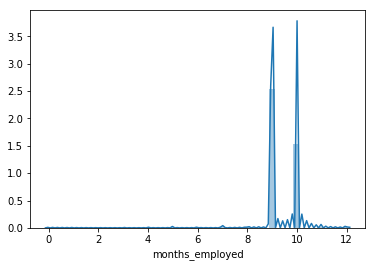

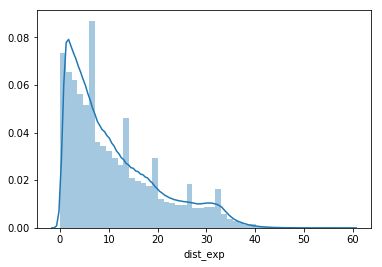

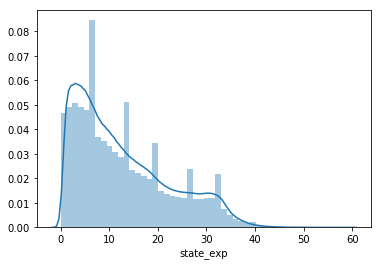

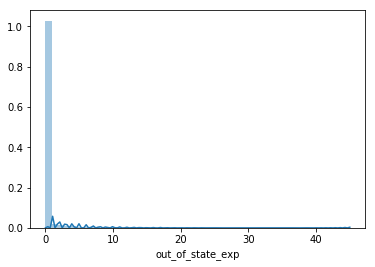

In [105]:
#Relevant columns for modeling
columns=['months_employed','dist_exp', 'state_exp', 'out_of_state_exp']

    
    
for col in columns:
    sns.distplot(data[col])
    plt.show()

In [106]:
for i in data.columns:
    if '_desc' in i:
        print (i)
        print ('---')
        print (data[i].value_counts())

race_ethnicity_desc
---
White, Non-Hispanic                          889515
White                                        216079
Black, Non-Hispanic                           89798
Hispanic                                      47675
Black or African American                     17884
Hispanic or Latino                            13232
Asian or Pacific Islander                     12458
Unknown                                        4933
Asian                                          3279
American Indian or Alaskan Native              2199
Two or More Races                              1947
Native Hawaiian or Other Pacific Islander       237
missing                                         231
Name: race_ethnicity_desc, dtype: int64
tsr_status_desc
---
Active    1299467
Name: tsr_status_desc, dtype: int64
location_desc
---
One School in this District                             1233161
Multiple Schools in this District                         63891
One School this District, plus other Dis

assign1_desc
---
Elementary Self Contained (K-5 Only)           292149
Elementary Self-Contained (K-3 Only)           101844
Learning Behavior Specialist I                  82876
Physical Education                              72125
Language Arts (Grades 1-8 Only)                 59347
English (Grades 9-12 Only)                      54410
Basic and/or General Math                       43658
Cross Categorical                               34349
Specific Learning Disability (LD)               32415
General Science                                 30911
Art                                             30382
Algebra                                         28414
Vocal Music                                     24878
Spanish                                         24042
Early Childhood (Self-Contained Pre-K)          23942
Bilingual Education - Spanish                   23777
General Social Studies (Middle Grades Only)     22182
Instrumental Music                              17811
Biology (Gr

---
missing                                        1259654
General Science                                   5743
Language Arts (Grades 1-8 Only)                   4842
History (Middle Grades Only)                      4722
Basic and/or General Math                         4650
Reading                                           3221
General Social Studies (Middle Grades Only)       2899
Resource/Consultative Teacher                     1003
Health Education                                   947
English (Grades 9-12 Only)                         877
U.S. History (Grades 9-12 Only)                    709
Algebra                                            594
Art                                                582
World History (Grades 9-12 Only)                   439
Biology (Grades 9-12 Only)                         381
Political Science/Civics (Grades 9-12 Only)        371
Geometry (Grades 9-12 Only)                        365
Computer Literacy/Technology                       357
Physic

Name: assign6_desc, Length: 103, dtype: int64
assign7_desc
---
missing                                             1297417
Reading                                                 227
General Science                                         207
General Social Studies (Middle Grades Only)             202
U.S. History (Grades 9-12 Only)                         112
History (Middle Grades Only)                            109
Basic and/or General Math                                83
Health Education                                         67
Resource/Consultative Teacher                            67
Art                                                      59
Algebra                                                  55
World History (Grades 9-12 Only)                         52
English as a Second Language                             52
Geography (Middle Grades Only)                           50
English (Grades 9-12 Only)                               49
Physical Education                   

In [107]:
#Demographic vars.  Create dummies for these variables.
dem_vars=['gender', 'race_ethnicity_desc', 'location_desc', 'emply_desc', 'high_degre_desc', 'location_cd', 'high_grd_desc',
         'low_grd_desc']



In [108]:
data_dem=data[dem_vars]
dem_vars_dummies=pd.get_dummies(data_dem, columns=dem_vars)
dem_vars_dummies.head()

,gender_,gender_F,gender_M,race_ethnicity_desc_American Indian or Alaskan Native,race_ethnicity_desc_Asian,race_ethnicity_desc_Asian or Pacific Islander,race_ethnicity_desc_Black or African American,"race_ethnicity_desc_Black, Non-Hispanic",race_ethnicity_desc_Hispanic,race_ethnicity_desc_Hispanic or Latino,...,low_grd_desc_Kindergarten,low_grd_desc_NONE,low_grd_desc_Ninth,low_grd_desc_Preschool,low_grd_desc_Second,low_grd_desc_Seventh,low_grd_desc_Sixth,low_grd_desc_Tenth,low_grd_desc_Third,low_grd_desc_missing
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [109]:
dem_vars_dummies=dem_vars_dummies.drop(['gender_ ', 'gender_M'], axis=1)
dem_vars_dummies.head()

,gender_F,race_ethnicity_desc_American Indian or Alaskan Native,race_ethnicity_desc_Asian,race_ethnicity_desc_Asian or Pacific Islander,race_ethnicity_desc_Black or African American,"race_ethnicity_desc_Black, Non-Hispanic",race_ethnicity_desc_Hispanic,race_ethnicity_desc_Hispanic or Latino,race_ethnicity_desc_Native Hawaiian or Other Pacific Islander,race_ethnicity_desc_Two or More Races,...,low_grd_desc_Kindergarten,low_grd_desc_NONE,low_grd_desc_Ninth,low_grd_desc_Preschool,low_grd_desc_Second,low_grd_desc_Seventh,low_grd_desc_Sixth,low_grd_desc_Tenth,low_grd_desc_Third,low_grd_desc_missing
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [110]:
#Find float and int vars.
for i in data.columns:
    if data[i].dtype=='float64' or data[i].dtype=='int64':
        print (i)

Zip
Median
Mean
Pop
fy
dst_zip
sch_zip
tsr_status_cd
salary
months_employed
pct_emp
fte
dist_exp
state_exp
out_of_state_exp
high_degre_cd
pos_cd
assignment_1
assignment_2
assignment_3
assignment_4
assignment_5
assignment_6
assignment_7
pct_admin
year
salary_adjusted


In [111]:
continuous=['Pop', 'months_employed', 'pct_emp', 'dist_exp', 'state_exp', 'out_of_state_exp','Mean']

In [112]:
continuous_data=data[continuous]
continuous_data.head()

,Pop,months_employed,pct_emp,dist_exp,state_exp,out_of_state_exp,Mean
0,24299,9,100,1.0,11.0,2.0,87531.7847
1,24299,9,100,20.0,20.0,7.0,87531.7847
2,24299,9,100,12.0,12.0,9.0,87531.7847
3,24299,9,100,6.0,7.0,11.0,87531.7847
4,24299,9,100,5.0,6.0,3.0,87531.7847


In [113]:
salary=['salary_adjusted']
outcome=data[salary]

In [114]:
#Concatenate the dummies, the continuous vars, and outcome variable into one dataset.

dfs=[continuous_data, dem_vars_dummies, outcome]
overall=pd.concat(dfs, axis=1)
print (overall.shape)

(1299467, 80)


In [115]:
overall.head(10)

,Pop,months_employed,pct_emp,dist_exp,state_exp,out_of_state_exp,Mean,gender_F,race_ethnicity_desc_American Indian or Alaskan Native,race_ethnicity_desc_Asian,...,low_grd_desc_NONE,low_grd_desc_Ninth,low_grd_desc_Preschool,low_grd_desc_Second,low_grd_desc_Seventh,low_grd_desc_Sixth,low_grd_desc_Tenth,low_grd_desc_Third,low_grd_desc_missing,salary_adjusted
0,24299,9,100,1.0,11.0,2.0,87531.7847,1,0,0,...,0,0,0,0,0,1,0,0,0,53073.756300
1,24299,9,100,20.0,20.0,7.0,87531.7847,1,0,0,...,0,1,0,0,0,0,0,0,0,90340.875000
2,24299,9,100,12.0,12.0,9.0,87531.7847,1,0,0,...,1,0,0,0,0,0,0,0,0,62069.303359
3,24299,9,100,6.0,7.0,11.0,87531.7847,1,0,0,...,0,0,0,1,0,0,0,0,0,60260.735085
4,24299,9,100,5.0,6.0,3.0,87531.7847,1,0,0,...,1,0,0,0,0,0,0,0,0,54328.083096
5,24299,9,100,1.0,1.0,0.0,87531.7847,1,0,0,...,0,1,0,0,0,0,0,0,0,67262.186155
6,24299,9,100,25.0,30.0,0.0,87531.7847,0,0,0,...,0,0,0,0,0,1,0,0,0,93154.643528
7,24299,9,100,1.0,1.0,0.0,87531.7847,1,0,0,...,1,0,0,0,0,0,0,0,0,42792.070574
8,24299,9,100,2.0,5.0,0.0,87531.7847,1,0,0,...,0,1,0,0,0,0,0,0,0,58891.155656
9,24299,9,100,2.0,2.0,0.0,87531.7847,1,0,0,...,1,0,0,0,0,0,0,0,0,39682.616081


In [116]:
#For now, don't use the grade taught columns.  Remove those.

cols = [c for c in overall.columns if '_grd' not in c]
cols
overall=overall[cols]

In [117]:
#Create a smaller sample of this data to use for model building.  Too expensive to use all of it.

overall_sample=overall.sample(frac=.10)
overall_sample.shape

(129947, 49)

In [118]:
#Use this for a preliminary model.  Will use grid search with k-fold cross-validation to find good model.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

#Define parameters

def create_datasets(data):
    y=overall_sample['salary_adjusted']
    X=overall_sample.drop('salary_adjusted', axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test=create_datasets(overall_sample)



In [119]:
pipeline1 = Pipeline([('standardize', StandardScaler()),
                    ('lasso', Lasso(fit_intercept=True))])

lasso_params = {'lasso__alpha' : [1, 10, 100, 200, 500, 1000]}

search1=GridSearchCV(estimator=pipeline1, param_grid=lasso_params, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)


#Fit the model with the best parameters.
search1.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(search1.best_score_))

/anaconda3/envs/python-data/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/envs/python-data/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Best cross-validation score: -189616977.48


In [449]:
df_result_lasso = pd.DataFrame(search1.cv_results_)

In [450]:
df_result_lasso

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_lasso__alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,20.618171,0.026884,-1.895415e+08,-1.893530e+08,1,{u'lasso__alpha': 1},2,-1.885911e+08,-1.894584e+08,-1.955168e+08,...,-1.878578e+08,-1.895405e+08,-1.877968e+08,-1.895469e+08,-1.892005e+08,-1.893900e+08,10.200524,0.009091,3.100436e+06,344777.759063
1,4.234591,0.016655,-1.895352e+08,-1.893559e+08,10,{u'lasso__alpha': 10},1,-1.885934e+08,-1.894613e+08,-1.955274e+08,...,-1.878705e+08,-1.895434e+08,-1.877634e+08,-1.895498e+08,-1.892035e+08,-1.893928e+08,1.526331,0.001748,3.104142e+06,344771.878129
2,1.265594,0.017100,-1.896885e+08,-1.895644e+08,100,{u'lasso__alpha': 100},3,-1.887817e+08,-1.896639e+08,-1.958643e+08,...,-1.881791e+08,-1.897451e+08,-1.877703e+08,-1.897633e+08,-1.894163e+08,-1.896019e+08,0.084338,0.007831,3.147126e+06,341978.963947
3,1.077090,0.022797,-1.900587e+08,-1.899740e+08,200,{u'lasso__alpha': 200},4,-1.891348e+08,-1.900834e+08,-1.963161e+08,...,-1.885818e+08,-1.901467e+08,-1.881119e+08,-1.901954e+08,-1.898197e+08,-1.900028e+08,0.038723,0.019316,3.198160e+06,345754.321275
4,1.203124,0.022128,-1.922800e+08,-1.922015e+08,500,{u'lasso__alpha': 500},5,-1.913858e+08,-1.923076e+08,-1.985167e+08,...,-1.908443e+08,-1.923685e+08,-1.904706e+08,-1.924224e+08,-1.920525e+08,-1.922280e+08,0.028225,0.006256,3.291683e+06,352516.145600
5,0.962488,0.012050,-1.986365e+08,-1.985607e+08,1000,{u'lasso__alpha': 1000},6,-1.977240e+08,-1.986884e+08,-2.044069e+08,...,-1.971539e+08,-1.987100e+08,-1.972869e+08,-1.988285e+08,-1.980797e+08,-1.985272e+08,0.151954,0.004280,3.333617e+06,374026.892866


In [451]:
df_result_lasso['rmse']=np.sqrt(df_result_lasso['mean_test_score']*-1)
df_result_lasso

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_lasso__alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score,rmse
0,20.618171,0.026884,-1.895415e+08,-1.893530e+08,1,{u'lasso__alpha': 1},2,-1.885911e+08,-1.894584e+08,-1.955168e+08,...,-1.895405e+08,-1.877968e+08,-1.895469e+08,-1.892005e+08,-1.893900e+08,10.200524,0.009091,3.100436e+06,344777.759063,13767.408945
1,4.234591,0.016655,-1.895352e+08,-1.893559e+08,10,{u'lasso__alpha': 10},1,-1.885934e+08,-1.894613e+08,-1.955274e+08,...,-1.895434e+08,-1.877634e+08,-1.895498e+08,-1.892035e+08,-1.893928e+08,1.526331,0.001748,3.104142e+06,344771.878129,13767.177852
2,1.265594,0.017100,-1.896885e+08,-1.895644e+08,100,{u'lasso__alpha': 100},3,-1.887817e+08,-1.896639e+08,-1.958643e+08,...,-1.897451e+08,-1.877703e+08,-1.897633e+08,-1.894163e+08,-1.896019e+08,0.084338,0.007831,3.147126e+06,341978.963947,13772.745277
3,1.077090,0.022797,-1.900587e+08,-1.899740e+08,200,{u'lasso__alpha': 200},4,-1.891348e+08,-1.900834e+08,-1.963161e+08,...,-1.901467e+08,-1.881119e+08,-1.901954e+08,-1.898197e+08,-1.900028e+08,0.038723,0.019316,3.198160e+06,345754.321275,13786.176369
4,1.203124,0.022128,-1.922800e+08,-1.922015e+08,500,{u'lasso__alpha': 500},5,-1.913858e+08,-1.923076e+08,-1.985167e+08,...,-1.923685e+08,-1.904706e+08,-1.924224e+08,-1.920525e+08,-1.922280e+08,0.028225,0.006256,3.291683e+06,352516.145600,13866.507920
5,0.962488,0.012050,-1.986365e+08,-1.985607e+08,1000,{u'lasso__alpha': 1000},6,-1.977240e+08,-1.986884e+08,-2.044069e+08,...,-1.987100e+08,-1.972869e+08,-1.988285e+08,-1.980797e+08,-1.985272e+08,0.151954,0.004280,3.333617e+06,374026.892866,14093.845933


In [452]:
lasso_predictions=search1.predict(X_test)
lasso_predictions

array([ 79330.9068694 , 101749.61170912,  83229.50463148, ...,
        85503.63551691, 106560.99518803,  78816.1081394 ])

In [453]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(lasso_predictions, y_test))

13700.499600213285

In [454]:
best_lasso=search1.best_estimator_.named_steps['lasso'].coef_
best_lasso

array([ 4.47840457e+03,  3.59685800e+03,  4.28320717e+03,  2.86181672e+03,
        1.02767868e+04,  1.64183216e+03,  4.56926863e+03, -2.53712223e+03,
        1.40176545e+01,  6.54267773e+01,  5.22706962e+01,  1.84801712e+02,
        6.86983687e+02,  9.84218792e+01,  0.00000000e+00, -3.15047830e+01,
        0.00000000e+00,  9.85911300e+01, -1.44007419e+02, -2.74065434e+02,
       -9.99846283e+01, -0.00000000e+00, -8.13803315e+01,  2.31296993e+02,
       -1.37682895e+02, -3.19776499e+01,  8.15217083e+00,  9.33355019e+02,
       -0.00000000e+00, -0.00000000e+00, -1.44928013e+03, -3.38140998e+01,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -5.95317233e+03,
        8.07226174e+01,  5.52122504e+02,  0.00000000e+00, -6.12734623e+02,
        1.31668811e+02,  0.00000000e+00, -1.00292831e+00,  7.66809573e+00,
       -0.00000000e+00, -2.79564707e+00, -6.51934902e-04,  0.00000000e+00])

In [455]:
coefficients_df=pd.DataFrame(index=X_train.columns, data=best_lasso)

In [456]:
coefficients_df=coefficients_df.rename(index=str, columns={0:'coefficients'}).sort_values(by='coefficients', ascending=False)
coefficients_df

,coefficients
state_exp,10276.786790
Mean,4569.268627
Pop,4478.404565
pct_emp,4283.207166
months_employed,3596.857999
dist_exp,2861.816724
out_of_state_exp,1641.832156
emply_desc_Full-Time,933.355019
"race_ethnicity_desc_Black, Non-Hispanic",686.983687
high_degre_desc_Doctorate,552.122504


In [457]:
overall_sample.salary_adjusted.std()

23614.748744814427

In [458]:
#Try reducing the dimensions using PCA.


from sklearn.decomposition import PCA

pca = PCA()


pipeline2 = Pipeline([('standardize', StandardScaler()),
                      ('pca', pca),
                    ('lasso', Lasso(fit_intercept=True))])

lasso_params = {'lasso__alpha' : [.001, .01, 1, 10, 50, 100],
               'pca__n_components':[2, 4, 6, 8, 10, 15, 20]}

search2=GridSearchCV(estimator=pipeline2, param_grid=lasso_params, cv=10, scoring='explained_variance', n_jobs=-1)


#Fit the model with the best parameters.
search2.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(search2.best_score_))

Best cross-validation score: 0.59


In [459]:
df_result_lasso2 = pd.DataFrame(search2.cv_results_)
df_result_lasso2

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_lasso__alpha,param_pca__n_components,params,rank_test_score,split0_test_score,split0_train_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.288288,0.021244,0.204026,0.204059,0.001,2,"{u'pca__n_components': 2, u'lasso__alpha': 0.001}",39,0.205520,0.206376,...,0.201608,0.213688,0.207452,0.199606,0.204763,0.210202,0.039904,0.008025,0.004901,0.005641
1,1.345938,0.019084,0.531647,0.531715,0.001,4,"{u'pca__n_components': 4, u'lasso__alpha': 0.001}",36,0.539760,0.531154,...,0.516099,0.533469,0.528850,0.532006,0.527094,0.532740,0.037302,0.003796,0.008836,0.001216
2,1.200971,0.010285,0.532344,0.532646,0.001,6,"{u'pca__n_components': 6, u'lasso__alpha': 0.001}",30,0.539618,0.531582,...,0.517929,0.535166,0.529871,0.533995,0.528623,0.535127,0.041432,0.002673,0.008509,0.001778
3,1.313678,0.010933,0.534728,0.534964,0.001,8,"{u'pca__n_components': 8, u'lasso__alpha': 0.001}",21,0.541840,0.534898,...,0.518898,0.536868,0.530089,0.534563,0.528735,0.535277,0.029576,0.002954,0.009253,0.001231
4,1.610624,0.010213,0.567946,0.568808,0.001,10,"{u'pca__n_components': 10, u'lasso__alpha': 0....",16,0.580737,0.575276,...,0.537879,0.558258,0.557730,0.564899,0.556415,0.558901,0.100620,0.003739,0.014865,0.008094
5,1.725233,0.018976,0.586282,0.586330,0.001,15,"{u'pca__n_components': 15, u'lasso__alpha': 0....",10,0.598690,0.584863,...,0.567004,0.586106,0.570167,0.579516,0.587040,0.587813,0.079844,0.004781,0.013663,0.005127
6,1.841422,0.016924,0.594268,0.594429,0.001,20,"{u'pca__n_components': 20, u'lasso__alpha': 0....",1,0.599871,0.587917,...,0.578543,0.598340,0.588093,0.596792,0.588700,0.588967,0.078236,0.002601,0.009722,0.004011
7,1.331846,0.019905,0.204012,0.204047,0.01,2,"{u'pca__n_components': 2, u'lasso__alpha': 0.01}",41,0.205485,0.206341,...,0.201608,0.213683,0.207418,0.199569,0.204751,0.210199,0.094841,0.001322,0.004888,0.005640
8,1.678425,0.017577,0.531805,0.531884,0.01,4,"{u'pca__n_components': 4, u'lasso__alpha': 0.01}",34,0.539959,0.531329,...,0.516066,0.533405,0.528993,0.532298,0.527363,0.533030,0.183468,0.002703,0.008875,0.001198
9,1.341690,0.010748,0.532975,0.533153,0.01,6,"{u'pca__n_components': 6, u'lasso__alpha': 0.01}",27,0.540639,0.532874,...,0.517553,0.534583,0.530146,0.533857,0.528141,0.534904,0.051114,0.004624,0.008996,0.001137


In [460]:
best_lasso=search2.best_estimator_.named_steps['lasso'].coef_
best_lasso

array([-1193.01611911, -6211.4701364 ,  8526.23458915,   -48.26040661,
         -97.65193937,   599.45685683,   255.70870423,   643.54164074,
       -2859.0883901 , -2782.47914054,  -267.48981979,  -399.72663731,
       -2707.14177223, -1117.28969661, -1058.28200847,  1377.03188212,
         -44.14129507,   -13.47590031,  -266.83837487,   384.91963073])

In [461]:
lasso_predictions=search2.predict(X_test)
lasso_predictions

array([ 82002.39247783, 103679.0217752 ,  89506.91685303, ...,
        84572.76238295,  95743.97180709,  75133.5319426 ])

In [413]:
np.sqrt(mean_squared_error(lasso_predictions, y_test))

15153.355892640591

In [463]:
from sklearn.metrics import r2_score
r2_score(lasso_predictions, y_test)

0.31499610479495044

In [472]:
X_train.head()

,Pop,months_employed,pct_emp,dist_exp,state_exp,out_of_state_exp,Mean,gender_F,race_ethnicity_desc_American Indian or Alaskan Native,race_ethnicity_desc_Asian,...,high_degre_desc_Masters,high_degre_desc_None,high_degre_desc_Registered Nurse,high_degre_desc_missing,location_cd_,location_cd_A,location_cd_B,location_cd_C,location_cd_D,location_cd_missing
244999,38103,9,100,1.0,1.0,0.0,74700.8566,1,0,0,...,1,0,0,0,0,1,0,0,0,0
988350,3823,9,100,17.0,17.0,0.0,58007.8059,0,0,0,...,0,0,0,0,0,1,0,0,0,0
822530,64267,10,100,13.0,13.0,0.0,43087.0662,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1145584,6194,10,100,12.0,12.0,0.0,72501.3104,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1237928,6154,9,100,19.0,19.0,0.0,62454.4530,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [476]:
data.head()

,Zip,Median,Mean,Pop,fy,rcdt,dst_name,dst_addr,dst_city,dst_st,...,assign6_desc,assignment_7,assign7_desc,pct_admin,filename,year,salary_adjusted,years_exp_state,income_bucket,salary_bucket
0,60002.0,78051.555,87531.7847,24299,2006,34049034004,Antioch CCSD 34,964 Spafford St,Antioch,IL,...,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,53073.756300,11-20 years,"$75-$100,000","$50-$75,000"
1,60002.0,78051.555,87531.7847,24299,2006,34049117016,CHSD 117,1625 Deep Lake Rd,Lake Villa,IL,...,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,90340.875000,11-20 years,"$75-$100,000","$75-$100,000"
2,60002.0,78051.555,87531.7847,24299,2006,34049034004,Antioch CCSD 34,964 Spafford St,Antioch,IL,...,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,62069.303359,11-20 years,"$75-$100,000","$50-$75,000"
3,60002.0,78051.555,87531.7847,24299,2006,34049034004,Antioch CCSD 34,964 Spafford St,Antioch,IL,...,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,60260.735085,6-10 years,"$75-$100,000","$50-$75,000"
4,60002.0,78051.555,87531.7847,24299,2006,34049034004,Antioch CCSD 34,964 Spafford St,Antioch,IL,...,missing,0.0,missing,0.0,2006_tsr_public_dataset.csv,2006,54328.083096,6-10 years,"$75-$100,000","$50-$75,000"


In [518]:
#Read in census estimates for both land and population by zip code.

land_data=pd.read_csv('/Users/jonathan.phelan/Documents/Land_Area_Census.csv')
pop_zip=pd.read_csv('/Users/jonathan.phelan/Documents/census_zip_pop.csv')




In [519]:
land_data.head()

,Id2,Sq meters,Sq miles
0,60002,84457987,32.609412
1,60004,28701818,11.081834
2,60005,16979978,6.556006
3,60007,36460145,14.077341
4,60008,13389228,5.169610


In [520]:
#Merge the two files together on zip.
df=pd.merge(land_data, pop_zip, left_on='Id2', right_on='zip', how='inner')
df.head()

,Id2,Sq meters,Sq miles,zip,pop_estimates,margin_error
0,60002,84457987,32.609412,60002,23925,466
1,60004,28701818,11.081834,60004,49650,942
2,60005,16979978,6.556006,60005,30490,877
3,60007,36460145,14.077341,60007,33837,440
4,60008,13389228,5.169610,60008,22379,486


In [521]:
df['pop_density']=df['pop_estimates']/df['Sq miles']
df.head()

,Id2,Sq meters,Sq miles,zip,pop_estimates,margin_error,pop_density
0,60002,84457987,32.609412,60002,23925,466,733.683872
1,60004,28701818,11.081834,60004,49650,942,4480.305190
2,60005,16979978,6.556006,60005,30490,877,4650.697081
3,60007,36460145,14.077341,60007,33837,440,2403.649903
4,60008,13389228,5.169610,60008,22379,486,4328.953204


In [522]:
df=df.sort_values(by='pop_density', ascending=False)
df.head(10)

,Id2,Sq meters,Sq miles,zip,pop_estimates,margin_error,pop_density
702,61625,36486,0.014087,61625,603,101,42804.438941
286,60611,2094884,0.808839,60611,29026,995,35885.992573
330,60660,3303447,1.275468,60660,41774,1454,32751.897846
285,60610,3037781,1.172894,60610,37898,1260,32311.534388
301,60626,4416736,1.705311,60626,52007,1931,30497.069762
328,60657,5888326,2.273495,60657,68280,1617,30033.048546
313,60640,6234410,2.407119,60640,65198,2036,27085.488059
276,60601,999363,0.385856,60601,9791,877,25374.736209
331,60661,769603,0.297145,60661,7238,566,24358.446050
325,60654,1574555,0.607939,60654,14607,733,24027.077317


In [524]:
df.tail(15)

,Id2,Sq meters,Sq miles,zip,pop_estimates,margin_error,pop_density
581,61417,74422083,28.734528,61417,166,79,5.777022
706,61720,72676088,28.060396,61720,155,52,5.523800
1177,62639,88085814,34.010124,62639,187,85,5.498363
1017,62346,87714993,33.866950,62346,176,64,5.196807
880,62050,145095189,56.021568,62050,279,91,4.980225
1246,62833,119704170,46.218040,62833,227,72,4.911502
516,61313,108824104,42.017223,61313,200,89,4.759953
1015,62344,92668768,35.779613,62344,139,104,3.884894
1003,62323,107863325,41.646264,62323,143,45,3.433681
1355,62962,101668180,39.254305,62962,84,91,2.139893


In [525]:
df=df[['zip', 'pop_estimates', 'margin_error', 'pop_density']]
df.head()

,zip,pop_estimates,margin_error,pop_density
702,61625,603,101,42804.438941
286,60611,29026,995,35885.992573
330,60660,41774,1454,32751.897846
285,60610,37898,1260,32311.534388
301,60626,52007,1931,30497.069762


In [526]:
df.to_csv('/Users/jonathan.phelan/Documents/IL_pop_density.csv')

In [528]:
X_train.head()

,Pop,months_employed,pct_emp,dist_exp,state_exp,out_of_state_exp,Mean,gender_F,race_ethnicity_desc_American Indian or Alaskan Native,race_ethnicity_desc_Asian,...,high_degre_desc_Masters,high_degre_desc_None,high_degre_desc_Registered Nurse,high_degre_desc_missing,location_cd_,location_cd_A,location_cd_B,location_cd_C,location_cd_D,location_cd_missing
244999,38103,9,100,1.0,1.0,0.0,74700.8566,1,0,0,...,1,0,0,0,0,1,0,0,0,0
988350,3823,9,100,17.0,17.0,0.0,58007.8059,0,0,0,...,0,0,0,0,0,1,0,0,0,0
822530,64267,10,100,13.0,13.0,0.0,43087.0662,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1145584,6194,10,100,12.0,12.0,0.0,72501.3104,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1237928,6154,9,100,19.0,19.0,0.0,62454.4530,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [120]:
stats=master_df.pivot_table(index='pos_desc', values='salary_adjusted', aggfunc=[np.mean, min, max])
stats

,mean,min,max
,salary_adjusted,salary_adjusted,salary_adjusted
pos_desc,,,
Administrative Assistant,95616.512943,9121.459533,164597.557547
Adult Education,48907.566868,5247.317473,132176.447125
Assistant Director,107752.765472,11094.295878,164986.630769
Assistant Director of Special Ed,98961.660354,52497.608823,157491.754641
Assistant District Superintendent,136327.501233,6725.175551,164996.829544
Assistant Elementary Principal,110526.239542,4073.201173,164874.582156
Assistant High School Principal,115295.382149,2183.539130,164971.840152
Assistant Jr High/Middle Principal,95759.526845,12686.951869,164881.023027


In [166]:
master_df.salary_adjusted.quantile([.010, .995])

0.010     23023.046332
0.995    155275.007363
Name: salary_adjusted, dtype: float64